In [1]:
import os, sys, time
import pandas as pd
import numpy as np

In [2]:
def load_floss_dataset(n_change_points=2):
    desc_filename = "datasets/FLOSS/desc.txt"
    desc_file = np.genfromtxt(fname=desc_filename, delimiter=',', filling_values=[None], dtype=None, encoding='utf8')

    df = []

    for ts_name, window_size, floss_score, cp_1, cp_2 in desc_file:
        if n_change_points == 1 and cp_2 != -1: continue

        change_points = [cp_1]
        if cp_2 != -1: change_points.append(cp_2)

        ts = np.loadtxt(fname=os.path.join('datasets/FLOSS/', ts_name + '.txt'), dtype=np.float64)
        df.append((ts_name, window_size, np.array(change_points), ts))

    return pd.DataFrame.from_records(df, columns=["name", "window_size", "change points", "time_series"])


def load_ucrcp_dataset():
    desc_filename = "datasets/UCRCP/desc.txt"
    desc_file = []

    with open(desc_filename, 'r') as file:
        for line in file.readlines(): desc_file.append(line.split(","))

    df = []

    for row in desc_file:
        (ts_name, window_size), change_points = row[:2], row[2:]

        ts = np.loadtxt(fname=os.path.join('datasets/UCRCP/', ts_name + '.txt'), dtype=np.float64)
        df.append((ts_name, int(window_size), np.array([int(_) for _ in change_points]), ts))

    return pd.DataFrame.from_records(df, columns=["name", "window_size", "change points", "time_series"])


def load_combined_dataset():
    return pd.concat([load_floss_dataset(), load_ucrcp_dataset()])

In [18]:
df_floss = load_floss_dataset()
print(df_floss)

                                                name  window_size  \
0                                               Cane          100   
1                                       DutchFactory           24   
2                                             EEGRat           10   
3                                            EEGRat2           10   
4                                          Fetal2013           70   
5                                   GrandMalSeizures           10   
6                                  GrandMalSeizures2           10   
7                                       GreatBarbet1           50   
8                                       GreatBarbet2           50   
9                                         InsectEPG1           50   
10                                        InsectEPG2           50   
11                                        InsectEPG3           50   
12                                        InsectEPG4           50   
13                                

### Description
Cane          
DutchFactory   
EEGRat     - Electroencephalogram
EEGRat2
Fetal2013
GrandMalSeizures2   - illness
GreatBarbet1  - bird
GreatBarbet2
InsectEPG1    - Electrical Penetration Graph
InsectEPG2
InsectEPG3
InsectEPG4
NogunGun
PigInternalBleedingDatasetAirwayPressure
PigInternalBleedingDatasetArtPressureFluidFilled
PigInternalBleedingDatasetCVP
Powerdemand
PulsusParadoxusECG1   - Electrocardiogram 
PulsusParadoxusECG2
PulsusParadoxusSP02
RoboticDogActivityX
RoboticDogActivityY
RoboticDogActivityZ
SimpleSynthetic   - simulated
SuddenCardiacDeath1  - heart
SuddenCardiacDeath2
SuddenCardiacDeath3
TiltABP  - arterial blood pressure (ABP)
TiltECG
WalkJogRun1
WalkJogRun2


In [22]:
# pd.set_option('display.max_rows', None)
df_ucrcp = load_ucrcp_dataset()

                              name  window_size  \
0                            Adiac           10   
1                        ArrowHead           10   
2                             Beef           50   
3                        BeetleFly           10   
4                      BirdChicken           20   
5                              Car           20   
6                              CBF           20   
7            ChlorineConcentration           10   
8                     CinCECGTorso           10   
9                           Coffee           10   
10                       Computers           50   
11                        CricketX           10   
12                        CricketY           10   
13                        CricketZ           10   
14             DiatomSizeReduction           20   
15    DistalPhalanxOutlineAgeGroup           50   
16                 DistalPhalanxTW           10   
17                     Earthquakes           10   
18                          ECG

In [4]:
cane = df_floss.loc[0]
series_cane = cane.iloc[3]
#???powerdemand = df_floss.iloc[df_floss['name'] == 'Powerdemand']
powerdemand = df_floss.loc[17]
series_powerdemand = powerdemand.iloc[3]
print('Cane:', series_cane)
print('Powerdemand:', series_powerdemand)

Cane: [-0.3205028  -0.37070978 -0.393024   ... -0.23917463 -0.22843261
 -0.20157757]
Powerdemand: [ 90.  86.  90. ... 240. 239. 232.]


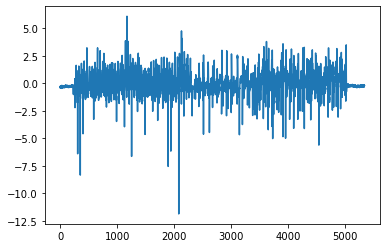

In [5]:
import matplotlib.pyplot as plt
plt.plot(series_cane)
plt.show()

Dataset: Cane
Series: -0.3205028
Mean: 3.005617940134096e-10
Median: -0.18009354
Max: 6.0836772
Min: -11.856953


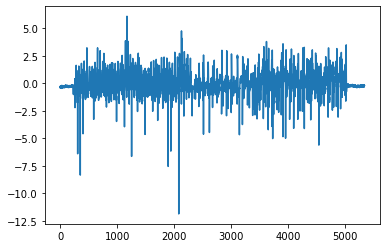


Dataset: DutchFactory
Series: 1022.0
Mean: 1145.9574249514897
Median: 1011.0
Max: 1985.0
Min: 622.0


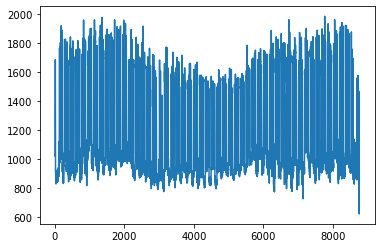


Dataset: EEGRat
Series: -0.1671106
Mean: 5.287000046649836e-10
Median: -0.11430282
Max: 4.6356132
Min: -3.9296869


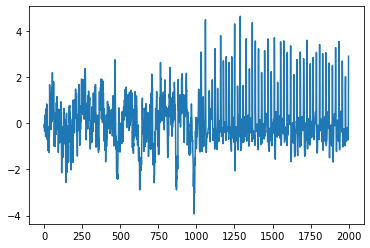


Dataset: EEGRat2
Series: -1.0569423
Mean: 2.861500014716967e-10
Median: -0.15246173000000002
Max: 4.6356132
Min: -2.6946548


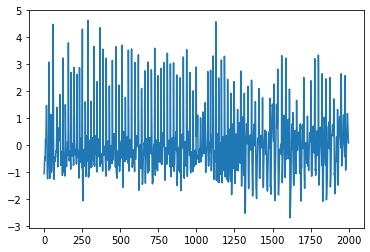


Dataset: Fetal2013
Series: 219.0
Mean: 13.599666666666666
Median: -3.0
Max: 1765.0
Min: -1104.0


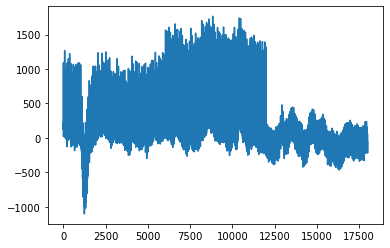


Dataset: GrandMalSeizures
Series: 24.0
Mean: 0.011935763888888888
Median: 0.0
Max: 1230.0
Min: -799.0


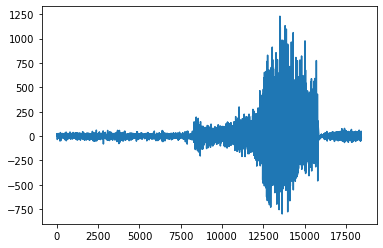


Dataset: GrandMalSeizures2
Series: -14.0
Mean: 0.0020128438608262244
Median: 0.0
Max: 396.0
Min: -335.0


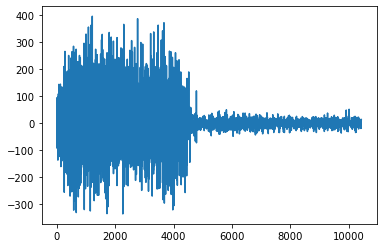


Dataset: GreatBarbet1
Series: 1.9344661
Mean: 6.04872392362635e-11
Median: -0.120954805
Max: 3.5572964
Min: -3.2877529


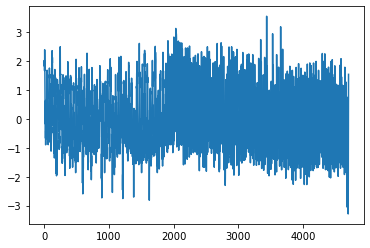


Dataset: GreatBarbet2
Series: 3.1691109
Mean: 2.205057507745415e-10
Median: -0.0681428765
Max: 5.1674605
Min: -2.801358


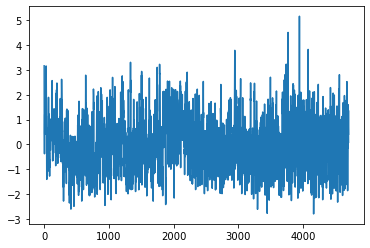


Dataset: InsectEPG1
Series: 0.22095
Mean: 0.10675773410975825
Median: 0.091553
Max: 0.53223
Min: -0.13672


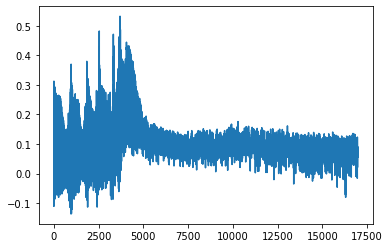


Dataset: InsectEPG2
Series: 0.010986
Mean: 0.02748666483351665
Median: 0.031738
Max: 0.55542
Min: -0.68604


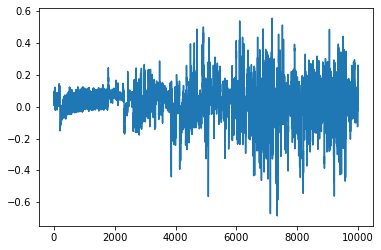


Dataset: InsectEPG3
Series: 0.057373
Mean: 0.005499160405656334
Median: 0.0085449
Max: 0.29419
Min: -0.17456


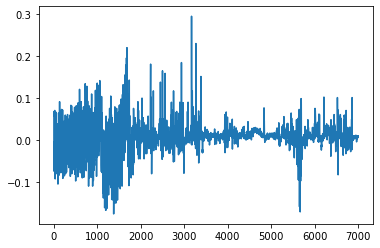


Dataset: InsectEPG4
Series: -0.18799
Mean: -0.05787536377032788
Median: -0.048828
Max: 0.10132
Min: -0.31616


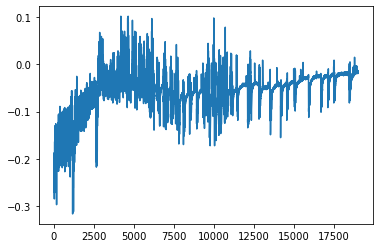


Dataset: NogunGun
Series: 380.37058
Mean: 313.79874121468237
Median: 378.42587
Max: 410.11755
Min: 0.0


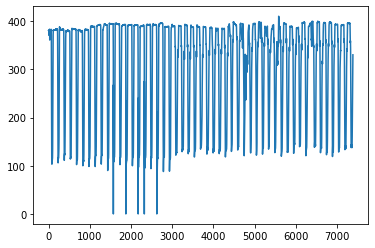


Dataset: PigInternalBleedingDatasetAirwayPressure
Series: 3.710937
Mean: 4.405150949969945
Median: 2.1972661
Max: 14.959717
Min: 0.32043499


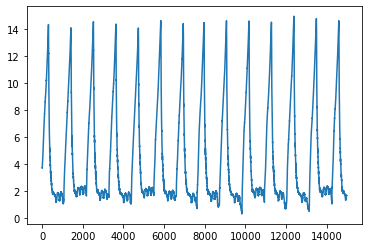


Dataset: PigInternalBleedingDatasetArtPressureFluidFilled
Series: 66.238403
Mean: 72.83742603299272
Median: 71.26236
Max: 97.072601
Min: 58.700562


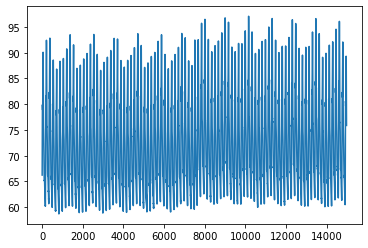


Dataset: PigInternalBleedingDatasetCVP
Series: 2.9525759
Mean: 3.7600838822398654
Median: 3.799438
Max: 14.289856
Min: -12.91275


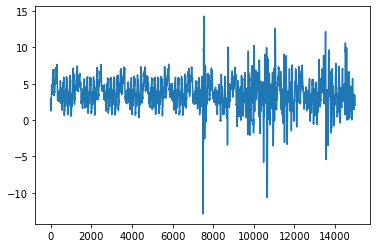


Dataset: Powerdemand
Series: 90.0
Mean: 169.2729888049987
Median: 167.0
Max: 279.0
Min: 71.0


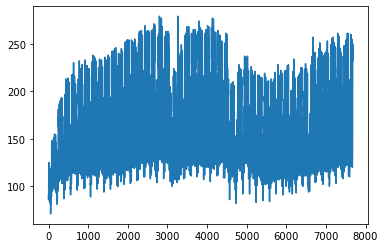


Dataset: PulsusParadoxusECG1
Series: -0.60989066
Mean: -9.126788900176485e-05
Median: -0.17145814
Max: 5.6167276
Min: -7.7053394


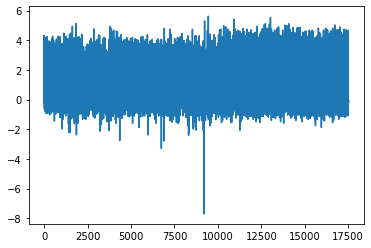


Dataset: PulsusParadoxusECG2
Series: -0.78362431
Mean: 1.5549180777240067e-06
Median: -0.26357094
Max: 5.3999303
Min: -1.1642792


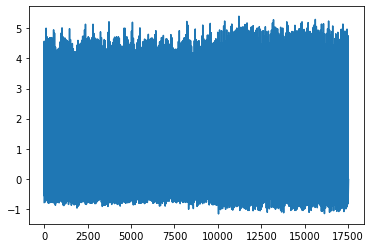


Dataset: PulsusParadoxusSP02
Series: -1.1938294
Mean: 0.00016094246053307415
Median: -0.2481344
Max: 3.0290433
Min: -2.4638479


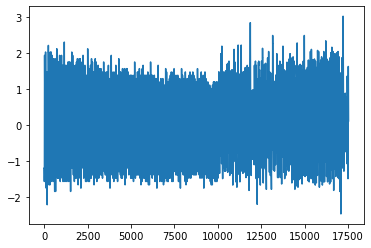


Dataset: RoboticDogActivityX
Series: -0.6247464
Mean: 2.8025828466534225e-10
Median: 0.058451765
Max: 4.8406094
Min: -7.4389383


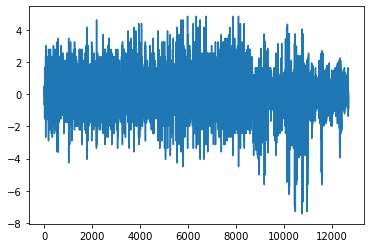


Dataset: RoboticDogActivityY
Series: -0.40783172
Mean: 8.55840592097298e-11
Median: 0.058588218
Max: 4.9560368
Min: -7.4389383


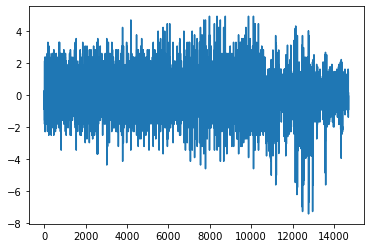


Dataset: RoboticDogActivityZ
Series: 0.10702299
Mean: -3.2654545546764978e-09
Median: -0.20990315
Max: 4.5627452
Min: -3.2709941


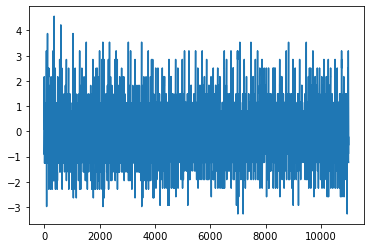


Dataset: SimpleSynthetic
Series: 0.017922238
Mean: 0.1613094412070641
Median: 0.31312454
Max: 1.1231371
Min: -1.08942


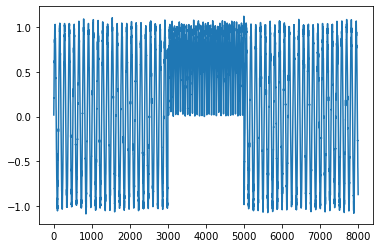


Dataset: SuddenCardiacDeath1
Series: 67.0
Mean: -24.773083333333332
Median: -42.0
Max: 960.0
Min: -677.0


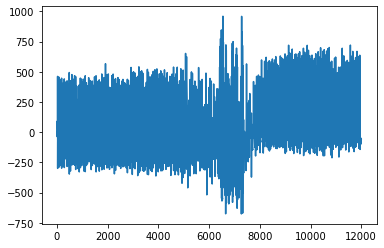


Dataset: SuddenCardiacDeath2
Series: 275.0
Mean: 30.430380801599867
Median: 1.0
Max: 2047.0
Min: -1393.0


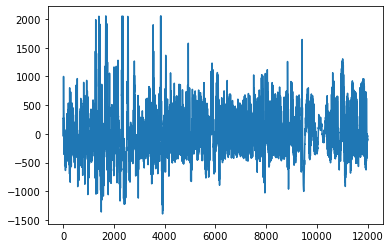


Dataset: SuddenCardiacDeath3
Series: 1124.0
Mean: -32.84217981834847
Median: -97.0
Max: 2047.0
Min: -1655.0


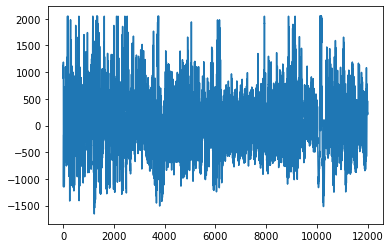


Dataset: TiltABP
Series: 6832.0
Mean: 4578.0895
Median: 4404.0
Max: 7296.0
Min: 2924.0


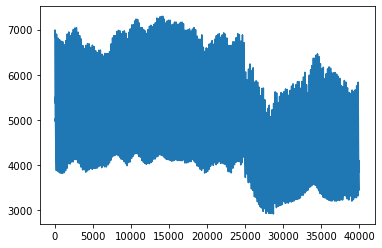


Dataset: TiltECG
Series: -5212.0
Mean: -7917.9367
Median: -8196.0
Max: -2080.0
Min: -16508.0


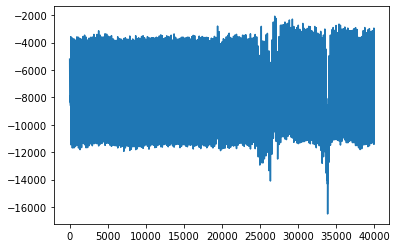


Dataset: WalkJogRun1
Series: 0.014992832
Mean: 0.5919546244667694
Median: 1.0247927
Max: 17.189599
Min: -16.473647


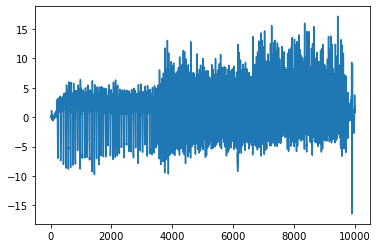


Dataset: WalkJogRun2
Series: -0.35883562
Mean: 0.03640050956573141
Median: 0.049817119
Max: 19.261119
Min: -23.415648


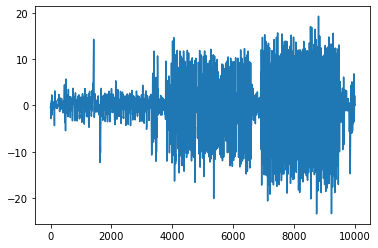

In [16]:
import numpy as np
serie_floss = df_floss[['name', 'time_series']]
#print('serie_floss:', serie_floss)
for i, row in serie_floss.iterrows():
    name = row['name']
    series = row['time_series']
    #series = row.squeeze()
    print('Dataset:', name)
    print('Series:', series[0])
    print('Mean:', np.mean(series))
    print('Median:', np.median(series))
    print('Max:', np.max(series))
    print('Min:', np.min(series))
    plt.plot(series)
    plt.show()
    print()